* Importamos las librerias necesarias

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

* Subimos el dataframe de trabajo

In [ ]:
df = pd.read_csv("C:/Archivos Globant/Globant/Challenge/Challenge - Data Scientist -20220817/dataset_SCL.csv")
df.head()

* Cambiamos los nombres de las columnas para que todos estén en minúsculas y sin signos de puntuación

In [ ]:
col_names = {col: col.lower().replace('-','_') for col in df .columns.values}
df.rename(columns=col_names, inplace=True)
df.head()

In [ ]:
#daym_delay = df[['dia', 'vlo_o']]
daym_delay=df.groupby(by=['dia'])['des_i'].agg(['count']).reset_index().rename(columns={'count': 'numero_vuelos'})
daym_delay=daym_delay.reset_index(drop=False)
daym_delay.head(7)

plt.figure(figsize=(15,8))
sns.barplot(x="dia", y="numero_vuelos", data=daym_delay)
plt.show()

Se observa unadistribuciín similar en el número de vuelos por día, a exepción de los 3 últimos días. 

In [ ]:
#plot data
group_vlo_i_vlo_o = df.groupby(by=['siglades','des_i'])['des_i'].agg(['count']).reset_index()
#group_vlo_i_vlo_o.to_csv('group_vlo_i_vlo_o.csv', sep=',', encoding='utf-8')
group_vlo_i_vlo_o

In [ ]:
print('numero resgistros:',df.shape[0])
print('numero columnas:',df.shape[1])
print('nombre columnas:',df.columns)

In [ ]:
df.info()

* Identificar faltantes

In [ ]:
def faltantes(df):
    return df.isna().sum()
           #df.isnull().sum()

faltantes(df)

* Verificar el único registro que contiene un "NaN" en el campo número de vuelo programado (vlo_o).

In [ ]:
print('Total de rows con nans:  ', df[df.isna().any(axis=1)].shape[0])
df[df.isna().any(axis=1)].head(2)

* Verificar las fechas minimas y máximas de los vuelos

In [ ]:
df["fecha_i_dt"] = pd.to_datetime(df["fecha_i"])
df["fecha_o_dt"] = pd.to_datetime(df["fecha_o"])

def data_profiling_fechas(cols, df):
    data_profiling = {}
    for col in cols:
        data_profiling[col] = {'uniques': df[col].nunique(), 
                               'prop_uniques': df[col].nunique()/df[col].shape[0],
                               'fecha_minima': df[col].min(),
                               'fecha_maxima': df[col].max(),
                               'anios_diferentes': df[col].dt.year.nunique(),
                               'dias_diferentes': df[col].max() - df[col].min()
                              } 
    return pd.DataFrame.from_dict(data_profiling)

data_profiling_fechas(['fecha_i_dt','fecha_o_dt'], df)

* Funcion para revisar los datos y elegir una codificacion

In [ ]:
def print_uniqueness(data=pd.DataFrame(), x = None):
    '''
    This function prints the unique values of the column specified in x
    for the data, and the number of unique values.
    data:= [pandas data frame], data
    x:= [string] column of the data to analize
    '''
    v = data[x].unique()
    print('Unique values of', x, ':')
    print(v)
    print('Number of unique values: ', len(v))
    print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%')
    print()
    return 0

# Iteramos sobre las variables categoricas
for c in ['fecha_i', 'vlo_i', 'ori_i', 'des_i', 'emp_i', 'fecha_o', 'vlo_o', 'ori_o', 'des_o', 'emp_o', 
          'dia', 'mes', 'año', 'dianom', 'tipovuelo','opera', 'siglaori', 'siglades']:
    print_uniqueness(df, c)

#### Lo más relevante del análisis anterior es que:

* Existen 64 códigos de ciudades de destinos programados.

Unique values of des_i :
['KMIA' 'KDFW' 'SAEZ' 'CYYZ' 'LFPG' 'MMMX' 'SABE' 'SKBO' 'LIRF' 'EGLL'
 'MPTO' 'KATL' 'SBGR' 'SBGL' 'SBFL' 'LEMD' 'SPJC' 'YSSY' 'KIAH' 'SGAS'
 'SBFI' 'SCTE' 'SCCI' 'SCNT' 'SCBA' 'SCVD' 'SCQP' 'SCIE' 'SCSE' 'SCAT'
 'SCCF' 'SCFA' 'SCDA' 'SCAR' 'SAME' 'SACO' 'SUMU' 'SCPQ' 'SCJO' 'KMCO'
 'KJFK' 'SEGU' 'MMUN' 'MDPC' 'KLAX' 'NZAA' 'SCIP' 'SLLP' 'SLVR' 'SBCT'
 'SEQM' 'SAZS' 'SAAR' 'SANT' 'YMML' 'SEQU' 'SANU' 'SAZN' 'SPSO' 'SAWH'
 'EGYP' 'SULS' 'SLCB' 'SARI']
Number of unique values:  64
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

* Existen 30 códigos de aerolíneas de vuelos programados, pero existe 32 códigos de aerolíneas de vuelos operados.

Unique values of emp_i : Código aerolínea de vuelo programado.
['AAL' 'ACA' 'AFR' 'AMX' 'ARG' 'AUT' 'AVA' 'AZA' 'BAW' 'CMP' 'DAL' 'GLO'
 'IBE' 'KLM' 'QFU' 'UAL' 'LAP' 'TAM' 'SKU' 'LAN' 'LAW' 'JMR' 'LXP' 'LNE'
 'LPE' 'DSM' 'PUE' 'JAT' 'ONE' 'LRC']
Number of unique values:  30
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Unique values of emp_o : Código aerolínea de vuelo operado.
['AAL' 'ACA' 'AFR' 'AMX' 'ARG' 'AUT' 'AVA' 'AZA' 'BAW' 'CMP' 'DAL' 'GLO'
 'IBE' 'KLM' 'QFA' 'UAL' 'LAP' 'TAM' 'SKU' 'LAN' 'LXP' 'LNE' 'LPE'
 'DSM' '48O' '56R' 'JMR' 'PUE' 'JAT' 'TPU' 'ONE' 'LRC']
Number of unique values:  32
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

* Existen 23 nombres de aerolíneas que operan

Unique values of opera :
['American Airlines' 'Air Canada' 'Air France' 'Aeromexico'
 'Aerolineas Argentinas' 'Austral' 'Avianca' 'Alitalia' 'British Airways'
 'Copa Air' 'Delta Air' 'Gol Trans' 'Iberia' 'K.L.M.' 'Qantas Airways'
 'United Airlines' 'Grupo LATAM' 'Sky Airline' 'Latin American Wings'
 'Plus Ultra Lineas Aereas' 'JetSmart SPA' 'Oceanair Linhas Aereas'
 'Lacsa']
Number of unique values:  23
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

* El campo ori_i tiene un solo valor, por lo que se puede eliminar del análisis

Unique values of ori_i :
['SCEL']
Number of unique values:  1
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

* El campo siglaori tiene un solo valor, por lo que se puede eliminar del análisis

Unique values of siglaori :
['Santiago']
Number of unique values:  1

In [ ]:
print('Numero de vuelos unicos:  ',len(df['vlo_i'].unique()))

#### 1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

* Contruyo una variable para observar gráficamente en que fecha se acumulan el número de vuelos

In [ ]:
# Agrupación por fecha_i
df["fecha_i_V2"] = pd.to_datetime(df["fecha_i"]).dt.date
df_num_vuelos_x_dia = df.groupby(by=['fecha_i_V2'])['vlo_i'].agg(['count']).reset_index().rename(columns={'count': 'Num_vuelos_x_dia'}).sort_values(['Num_vuelos_x_dia',],ascending = False)
print('shape:',df_num_vuelos_x_dia.shape)
df_num_vuelos_x_dia.head(10)
# Existen 365 fecha programadas diferentes. 
# Se observa que la fecha programada con más vuelos es el 2017-12-22, ya que se tienen 230 vuelos en este día.

In [ ]:
df_num_vuelos_x_dia.tail(10)
# Se observa que la fecha programada con menos vuelos es el 2017-12-04, ya que se tienen 126 vuelos en este día.

In [ ]:
# Dsitribución del Top 50 de fechas programadas por numero de vuelos por dia
plt.figure(figsize = (15,8))
plt.xticks(rotation=90)
sns.set_color_codes("pastel")
sns.barplot(data=df_num_vuelos_x_dia.sort_values(['Num_vuelos_x_dia',],ascending = False).head(50),x="fecha_i_V2", y="Num_vuelos_x_dia",)

In [ ]:
#df.info()
#df_v2 = df.copy()
df['vlo_i'] = df['vlo_i'].astype('string')

plt.figure(figsize = (15,8))
plt.xticks(rotation=90)
ax = sns.histplot(data=df, x="vlo_i", stat="count", shrink=0.8, )

In [ ]:
plt.figure(figsize = (15,8))
plt.xticks(rotation=90)
ax = sns.histplot(data=df, x="des_i", stat="count", shrink=0.8, )

In [ ]:
# Porcentaje del tipo de vuelo
tipovuelo_counts = pd.DataFrame(df.tipovuelo.value_counts(normalize=True))
print(tipovuelo_counts)

plt.figure(figsize = (15,8))
plt.xticks(rotation=90)
ax = sns.histplot(data=df, x="tipovuelo", stat="count", shrink=0.8)

* Gráfica: Fecha de vuelos Programados

In [ ]:
df['fecha_i_v3'] = df['fecha_i_V2'].astype('string') 
df_fecha_i = df[['fecha_i_v3','vlo_i']]
df_fecha_i['fecha_i_v3'] = df_fecha_i['fecha_i_v3'].str[:4] + df_fecha_i['fecha_i_v3'].str[5:7]
df_fecha_i.rename(columns={'fecha_i_v3': 'month_year'}, inplace=True)
df_fecha_i = df_fecha_i.groupby(by=['month_year'])['vlo_i'].agg(['count']).reset_index().rename(columns={'count': 'num_vuelos_prog_month_year'}).sort_values('month_year',ascending = True)
df_fecha_i = df_fecha_i.reset_index().rename(columns={'index': 'indice'})
#df_fecha_i

plt.figure(figsize = (15,5))
plt.xticks(rotation=90)
ax = sns.lineplot(x="month_year", y="num_vuelos_prog_month_year",data=df_fecha_i)


* Gráfica: Fecha de vuelos Operados

In [ ]:
df["fecha_o_V2"] = pd.to_datetime(df["fecha_o"]).dt.date
df['fecha_o_V3'] = df['fecha_o_V2'].astype('string')
df_fecha_o = df[['fecha_o_V3','vlo_o']]
df_fecha_o['fecha_o_V3'] = df_fecha_o['fecha_o_V3'].str[:4] + df_fecha_o['fecha_o_V3'].str[5:7]
df_fecha_o.rename(columns={'fecha_o_V3': 'month_year'}, inplace=True)
df_fecha_o = df_fecha_o.groupby(by=['month_year'])['vlo_o'].agg(['count']).reset_index().rename(columns={'count': 'num_vuelos_oper_month_year'}).sort_values('month_year',ascending = True)
df_fecha_o = df_fecha_o.reset_index().rename(columns={'index': 'indice'})
#df_fecha_o

plt.figure(figsize = (15,5))
plt.xticks(rotation=90)
ax = sns.lineplot(x="month_year", y="num_vuelos_oper_month_year",data=df_fecha_o)

#### 2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :
* temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no
* dif_min : diferencia en minutos entre Fecha-O y Fecha-I 
* atraso_15 : 1 si dif_min > 15, 0 si no
* periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I


In [ ]:
#df = df.copy()
#mask = (df['fecha_i_dt'] > '2017-03-03 00:00:00') & (df['fecha_i_dt'] <= '2017-12-16 00:00:00')
#mask
#df_2 = df.loc[mask]
#df_2

In [ ]:
# temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
df['temporada_alta'] = np.where(((df['fecha_i_dt'] >= '2016-12-15 00:00:00') & (df['fecha_i_dt'] < '2017-03-04 00:00:00')) | 
                                ((df['fecha_i_dt'] >= '2017-07-15 00:00:00') & (df['fecha_i_dt'] < '2017-08-01 00:00:00')) |
                                ((df['fecha_i_dt'] >= '2017-07-15 00:00:00') & (df['fecha_i_dt'] < '2017-08-01 00:00:00')) |
                                ((df['fecha_i_dt'] >= '2017-12-15 00:00:00') & (df['fecha_i_dt'] < '2018-03-04 00:00:00')),1, 0)
pc_1 = pd.DataFrame(df.temporada_alta.value_counts(normalize=True))
print(pc_1)
#df.to_csv("C:/Archivos Globant/Globant/Challenge/Challenge - Data Scientist -20220817/df_borrar_v2.csv", sep=',', encoding='utf-8')
df.head(2)

In [ ]:
# dif_min : diferencia en minutos entre Fecha-O y Fecha-I 

df['dif_min'] = df['fecha_o_dt'] - df['fecha_i_dt']
df['dif_min'] = df.dif_min.dt.total_seconds() / 60
df.head(3)

In [ ]:
df = df.drop(['atraso_15'], axis=1)
df.head(1)

In [ ]:
# atraso_15 : 1 si dif_min > 15, 0 si no
df['atraso_15'] = df["dif_min"].apply(lambda x: 1 if int(x)> 15 else 0)
pc_atraso_15 = pd.DataFrame(df.atraso_15.value_counts(normalize=True))
print(pc_atraso_15)
df.head(2)

# El 18.5% de los registro son atrasos cuando dif_min > 15

In [ ]:
df.atraso_15.info()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
sns.countplot('mes', data=df, ax=ax[0])
ax[0].set_title('Número de vuelos por mes')
sns.countplot('mes', hue='atraso_15', data=df, ax=ax[1])
ax[1].set_title('Vuelos atrasados/No Atrazados por mes')
plt.figure(figsize=(18,4))
sns.barplot('mes', 'atraso_15', data=df)
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
sns.countplot('dianom', data=df, ax=ax[0])
ax[0].set_title('Número de vuelos por por dia de la semana')
sns.countplot('dianom', hue='atraso_15', data=df, ax=ax[1])
ax[1].set_title('Vuelos atrasados/No Atrazados por dia de la semana')
plt.figure(figsize=(18,4))
sns.barplot('dianom', 'atraso_15', data=df)
plt.show()

In [ ]:
# Inspired from this kaggle kernel: https://www.kaggle.com/fabiendaniel/predicting-flight-delays-tutorial
import seaborn as sns 

def delay_by_attribute(attribute, df=df, figsize=(10, 7)):
    # Delay with less than 10 min are mapped to 0 otherwise they are mapped to 1
    delay_type = lambda x: 0 if x < 15 else 1
    df['DELAY_TYPE'] = df['dif_min'].apply(delay_type)
    
    plt.figure(1, figsize=figsize)
    ax = sns.countplot(y=attribute, hue='DELAY_TYPE', data=df)
    
    plt.xlabel('Flight count', fontsize=16, weight='bold')
    plt.ylabel(attribute, fontsize=16, weight='bold')
    plt.title(f'Delay by {attribute}', weight='bold')
    L = plt.legend()
    L.get_texts()[0].set_text('small delay (t < 15 min)')
    L.get_texts()[1].set_text('large delay (t > 15 min)')
    plt.grid(True)
    plt.show()

#delay_by_attribute('opera')
#delay_by_attribute('siglades')
delay_by_attribute('dianom')
#delay_by_attribute('tipovuelo')


In [ ]:
# Los atrasos se incremetaron en el mes de julio
atrasos = df[df['atraso_15'] == 1]
atrasos[['fecha_o_V2','atraso_15']].groupby(['fecha_o_V2']).count().plot()
plt.show()

In [ ]:
def get_stats(group):
    return {#'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

global_stats = df['atraso_15'].groupby(df['opera']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count',ascending = False)
global_stats

In [ ]:
# periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I
from datetime import time

#periodo_dia : mañana (entre 5:00 y 11:59)
filtro_1 = (df.fecha_i_dt.dt.time >= time(5, 0)) & (df.fecha_i_dt.dt.time <= time(11, 59))
df_filtro_1 = pd.DataFrame(filtro_1)
df_filtro_1.rename(columns={'fecha_i_dt': 'periodo_manana'},inplace=True)
df_filtro_1.replace({True:1 ,False:0}, inplace=True)
#df_filtro_1['periodo_manana'] = df_filtro_1['periodo_manana'].map({True:1 ,False:0}) 
pc_periodo_manana = pd.DataFrame(df_filtro_1.periodo_manana.value_counts(normalize=True))
print('Periodo de Mañana (entre 5:00 y 11:59)')
print(pc_periodo_manana)
df_filtro_1

print('*'*40)

# periodo_dia : tarde (entre 12:00 y 18:59)
filtro_2 = (df.fecha_i_dt.dt.time >= time(12, 0)) & (df.fecha_i_dt.dt.time <= time(18, 59))
df_filtro_2 = pd.DataFrame(filtro_2)
df_filtro_2.rename(columns={'fecha_i_dt': 'periodo_tarde'},inplace=True)
df_filtro_2.replace({True:1 ,False:0}, inplace=True)
pc_periodo_tarde = pd.DataFrame(df_filtro_2.periodo_tarde.value_counts(normalize=True))
print('Periodo de tarde (entre 12:00 y 18:59)')
print(pc_periodo_tarde)

print('*'*40)

# periodo_dia : noche (entre 19:00 y 4:59)
filtro_3 = (df.fecha_i_dt.dt.time >= time(19, 0)) | (df.fecha_i_dt.dt.time <= time(4, 59))
df_filtro_3 = pd.DataFrame(filtro_3)
df_filtro_3.rename(columns={'fecha_i_dt': 'periodo_noche'},inplace=True)
df_filtro_3.replace({True:1 ,False:0}, inplace=True)
pc_periodo_noche = pd.DataFrame(df_filtro_3.periodo_noche.value_counts(normalize=True))
print('Periodo de noche (entre 19:00 y 4:59)')
print(pc_periodo_noche)

#dt_pba = pd.concat([df, df_filtro_1,df_filtro_2,df_filtro_3], axis=1,)
#print(dt_pba.shape)
#dt_pba = dt_pba[['fecha_i_dt','periodo_manana','periodo_tarde','periodo_noche']]
#dt_pba.to_csv("C:/Archivos Globant/Globant/Challenge/Challenge - Data Scientist -20220817/dt_pba_borrar_v1.csv", sep=',', encoding='utf-8')
#dt_pba

In [ ]:
# periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I
from datetime import time

filtro_1 = (df.fecha_i_dt.dt.time >= time( 5, 0)) & (df.fecha_i_dt.dt.time <= time(11, 59))
filtro_2 = (df.fecha_i_dt.dt.time >= time(12, 0)) & (df.fecha_i_dt.dt.time <= time(18, 59))
filtro_3 = (df.fecha_i_dt.dt.time >= time(19, 0)) | (df.fecha_i_dt.dt.time <= time( 4, 59))

df[['periodo_dia']] = 'vacio'
df.loc[filtro_1, 'periodo_dia'] = 'mañana'
df.loc[filtro_2, 'periodo_dia'] = 'tarde'
df.loc[filtro_3, 'periodo_dia'] = 'noche'
pc_periodo_completo = pd.DataFrame(df.periodo_dia.value_counts(normalize=True))
print('Periodo completo')
print(pc_periodo_completo)
df.head(3)
print('*'*20)
print('shape df:',df.shape)

#dt_pba = df[['fecha_i_dt','periodo_dia']]
#dt_pba.to_csv("C:/Archivos Globant/Globant/Challenge/Challenge - Data Scientist -20220817/dt_pba_borrar_v2.csv", sep=',', encoding='utf-8')
#dt_pba


In [ ]:
plt.figure(figsize = (15,8))
plt.xticks(rotation=90)
ax = sns.histplot(data=df, x="periodo_dia", stat="count", shrink=0.8)

In [ ]:
# Expórte las columnas generadas en un archivo synthetic_features.csv :
dt_synthetic_features = df[['fecha_i_dt','temporada_alta','dif_min','atraso_15','periodo_dia']]
dt_synthetic_features.to_csv("C:/Archivos Globant/Globant/Challenge/Challenge - Data Scientist -20220817/synthetic_features.csv", sep=',', encoding='utf-8')
dt_synthetic_features.head(5)

3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?
¿Qué variables esperarías que más influyeran en predecir atrasos?
4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo.
Siéntete libre de generar variables adicionales y/o complementar con variables externas.
5. Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué
elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar la
performance?

#### 3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?


In [ ]:
# Tasa de atraso por destino
tasa_atraso_destino = pd.crosstab(df.des_o, df.atraso_15, margins = True,margins_name = "Total", normalize = False).reset_index()#.sort_values('Total',ascending = False)
tasa_atraso_destino[0] = tasa_atraso_destino[0] / tasa_atraso_destino["Total"]
tasa_atraso_destino[1] = tasa_atraso_destino[1] / tasa_atraso_destino["Total"]
print('dataframe:')
print(tasa_atraso_destino)
print('*'*46)
print('*'*46)
print('describe tasa_atraso_destino:')
print(tasa_atraso_destino[[0,1]].describe()[1:8])

In [ ]:
print(tasa_atraso_destino.sort_values(0,ascending = False).head(4))
print('*'*60)
print(tasa_atraso_destino.sort_values(1,ascending = False).head(3))

##### Comentario tasa de atraso por destino: 
* Se observa que la media de los vuelos no atrasados es de 75.97%, mientras que la media de los vuelos atrasados es de 24.02%.

##### Máximo, para atraso_15 igual a 0 y a 1 se alcanza el 100%. 
* Para atraso_15 = 0 los destinos con 100% de vuelos a tiempo son: SBFI, SBCT, KIAD, SPSO
* Para atraso_15 = 1 los destinos con 100% de vuelos atrasados son EGYP, SLCB, SEQM
* Sin embargo, en ambos casos tiene pocos vuelos

In [ ]:
#plt.figure(figsize = (15,2))
#g = sns.catplot(data=df[df['atraso_15'] == 1], col="atraso_15", x="des_o", kind="count",height=8, aspect=15/8)
#g.set_xticklabels(rotation=90)

In [ ]:
# Tasa de atraso por aerolínea
tasa_atraso_aerolinea = pd.crosstab(df.opera, df.atraso_15, margins = True,margins_name = "Total", normalize = False).reset_index()#.sort_values('Total',ascending = False)
tasa_atraso_aerolinea[0] = tasa_atraso_aerolinea[0] / tasa_atraso_aerolinea["Total"]
tasa_atraso_aerolinea[1] = tasa_atraso_aerolinea[1] / tasa_atraso_aerolinea["Total"]
print('dataframe:')
print(tasa_atraso_aerolinea)

In [ ]:
print('*'*46)
print('*'*46)
print('describe tasa_atraso_aerolinea:')
print(tasa_atraso_aerolinea[[0,1]].describe()[1:8])

In [ ]:
print(tasa_atraso_aerolinea.sort_values(0,ascending = False).head(1))
print('*'*60)
print(tasa_atraso_aerolinea.sort_values(1,ascending = False).head(1))

##### Comentario para tasa de atraso por aerolínea:
* Se observa que la media de los vuelos no atrasados es de 79.57%, mientras que la media de los vuelos atrasados es de 20.42%.

##### Máximos
* Cuando atraso_15 = 0, el destino Aeromexico alcanza una tasa de vuelos a tiempo de 97.15%, y una tasa de atraso de ta solo 2.84%
* Cuando atraso_15 = 1, el destino Plus Ultra Lineas Aereas presenta una tasa de vuelos en tiempo de 38.77% y tasa de atraso maxima de 61.22% 

In [ ]:
# Tasa de atraso por mes del año
tasa_atraso_mes = pd.crosstab(df.mes, df.atraso_15, margins = True,margins_name = "Total", normalize = False).reset_index()#.sort_values('Total',ascending = False)
tasa_atraso_mes[0] = tasa_atraso_mes[0] / tasa_atraso_mes["Total"]
tasa_atraso_mes[1] = tasa_atraso_mes[1] / tasa_atraso_mes["Total"]
print('dataframe:')
print(tasa_atraso_mes)
print('*'*46)
print('*'*46)
print('describe tasa_atraso_mes:')
print(tasa_atraso_mes[[0,1]].describe()[1:8])

In [ ]:
print(tasa_atraso_mes.sort_values(0,ascending = False).head(1))
print('*'*60)
print(tasa_atraso_mes.sort_values(1,ascending = False).head(1))

##### Comentario para tasa de atraso por mes:
* Se observa que la media de los vuelos no atrasados es de 81.74%, mientras que la media de los vuelos atrasados es de 18.25%.

##### Máximos
* Cuando atraso_15 = 0, el mes de marzo alcanza la tasa de vuelos a tiempo más alta con 88.48%, así como una tasa de atraso de 11.51%
* Cuando atraso_15 = 1, el mes de julio presenta una tasa de vuelos en tiempo de 70.29% y tasa de atraso maxima de 29.33% 

In [ ]:
# Tasa de atraso por día de la semana
tasa_atraso_dianom= pd.crosstab(df.dianom, df.atraso_15, margins = True,margins_name = "Total", normalize = False).reset_index()#.sort_values('Total',ascending = False)
tasa_atraso_dianom[0] = tasa_atraso_dianom[0] / tasa_atraso_dianom["Total"]
tasa_atraso_dianom[1] = tasa_atraso_dianom[1] / tasa_atraso_dianom["Total"]
print('dataframe:')
print(tasa_atraso_dianom)
print('*'*46)
print('*'*46)
print('describe tasa_atraso_dianom:')
print(tasa_atraso_dianom[[0,1]].describe()[1:8])

In [ ]:
print(tasa_atraso_dianom.sort_values(0,ascending = False).head(1))
print('*'*60)
print(tasa_atraso_dianom.sort_values(1,ascending = False).head(1))

##### Comentario para tasa de atraso por dia del mes de operación del vuelo:
* Se observa que la media de los vuelos no atrasados es de 81.58%, mientras que la media de los vuelos atrasados es de 18.41%.

##### Máximos
* Cuando atraso_15 = 0, en los días domingo se llega a la tasa de vuelos a tiempo más alta con 83.89%, así como una tasa de atraso de 16.10%
* Cuando atraso_15 = 1, en los días viernes se observa una tasa de vuelos en tiempo de 77.79% y tasa de atraso maxima de 22.20% 

In [ ]:
# Tasa de atraso por temporada
#¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?
tasa_atraso_temporada= pd.crosstab(df.temporada_alta, df.atraso_15, margins = True,margins_name = "Total", normalize = False).reset_index()#.sort_values('Total',ascending = False)
tasa_atraso_temporada[0] = tasa_atraso_temporada[0] / tasa_atraso_temporada["Total"]
tasa_atraso_temporada[1] = tasa_atraso_temporada[1] / tasa_atraso_temporada["Total"]
print('dataframe:')
print(tasa_atraso_temporada)
print('*'*46)
print('*'*46)
print('describe tasa_atraso_temporada:')
print(tasa_atraso_temporada[[0,1]].describe()[1:8])

In [ ]:
print(tasa_atraso_temporada.sort_values(0,ascending = False).head(1))
print('*'*60)
print(tasa_atraso_temporada.sort_values(1,ascending = False).head(1))

##### Comentario para tasa de atraso por temporada:
* Se observa que la media de los vuelos no atrasados es de 81.13%, mientras que la media de los vuelos atrasados es de 18.86%.

##### Máximos
* Cuando atraso_15 = 0, en la temporada baja se llega a la tasa de vuelos a tiempo más alta con 82.19%, así como una tasa de atraso de 17.80%
* Cuando atraso_15 = 1, en la temporada alta se llega a una tasa de vuelos en tiempo de 79.20% y a una tasa de atraso maxima de 20.28% 

In [ ]:
# Tasa de atraso por tipo de vuelo
tasa_atraso_tipovuelo= pd.crosstab(df.tipovuelo, df.atraso_15, margins = True,margins_name = "Total", normalize = False).reset_index()#.sort_values('Total',ascending = False)
tasa_atraso_tipovuelo[0] = tasa_atraso_tipovuelo[0] / tasa_atraso_tipovuelo["Total"]
tasa_atraso_tipovuelo[1] = tasa_atraso_tipovuelo[1] / tasa_atraso_tipovuelo["Total"]
print('dataframe:')
print(tasa_atraso_tipovuelo)
print('*'*46)
print('*'*46)
print('describe tasa_atraso_tipovuelo:')
print(tasa_atraso_tipovuelo[[0,1]].describe()[1:8])

In [ ]:
print(tasa_atraso_tipovuelo.sort_values(0,ascending = False).head(1))
print('*'*60)
print(tasa_atraso_tipovuelo.sort_values(1,ascending = False).head(1))

##### Comentario para tasa de atraso por tipo de vuelo:
* Se observa que la media de los vuelos no atrasados es de 81.29%, mientras que la media de los vuelos atrasados es de 18.70%.

##### Máximos
* Cuando atraso_15 = 0, el tipo de vuelo Nacional presenta la tasa de vuelos a tiempo más alta con 84.94%, así como una tasa de atraso de 15.05%
* Cuando atraso_15 = 1, el tipo de vuelo Internacional presenta una tasa de vuelos en tiempo de 77.43% y la tasa de atraso maxima de 22.56% 

#### 3. ¿Qué variables esperarías que más influyeran en predecir atrasos?
* Para determinar cuales de estas variables están mayormente correlacionadas, propongo hacer un análisis de chi-cuadrada.

In [ ]:
# No correr

# #df['temporada_alta'] = df['temporada_alta'].astype('string')
#df['dif_min'] = df['dif_min'].astype('float')
#df['atraso_15'] = df['atraso_15'].astype('string')
#df['periodo_dia'] = df['periodo_dia'].astype('string')

In [ ]:
# Encode variables
new_df_chi_q = df[['atraso_15','dia','mes','dianom','tipovuelo','opera','siglades','temporada_alta','periodo_dia','dif_min']]
new_df_chi_q = pd.get_dummies(new_df_chi_q, columns=['dia','mes','dianom','tipovuelo','opera','siglades','temporada_alta','periodo_dia'], drop_first=True)
new_df_chi_q.columns

In [ ]:
## Analicemos la Varianza
new_df_chi_q.std()/new_df_chi_q.mean()

In [ ]:
# Analicemos sus correlaciones de variables Continuas
# Se debería de analizar las variables continuas, sin emabrog, compo no se debe utilizar la variable "dif_min" para entrenar los modelos de ML, 
# ya que es la variable que se utilizó para construir atraso_15, entonces no analizaré los resultados de la correlación. 
#new_df_chi_q.columns
new_df_chi_q[['atraso_15','dif_min','mes']].corr()

In [1860]:
# Importemos chi2 de sklearn
from sklearn.feature_selection import chi2

# La idea básica de la prueba de chi-cuadrado: Prueba de hipótesis común basado en la distribución.
# Hipótesis H0: No hay diferencia entre la frecuencia observada y la frecuencia esperada, o bien, p value > 0.05,

catv = [c for c in new_df_chi_q.columns if ('dia' in c)|('mes' in c)|('dianom' in c)|('tipovuelo' in c)|('opera' in c)|('siglades' in c)|('temporada_alta' in c)|('periodo_dia' in c)]

#catv = [c for c in new_df_chi_q.columns if ('temporada_alta' in c)|('periodo_dia' in c)]

X = new_df_chi_q[catv]
y = new_df_chi_q['atraso_15']

chi_sq, p_val = chi2(X,y)
chi_values = pd.DataFrame.from_dict({'variable':X.columns,
                        'chi_sq':chi_sq, 'p_value':p_val})
chi_values.sort_values(ascending=True, by='p_value').round(3)

,variable,chi_sq,p_value
64,opera_Latin American Wings,546.681,0.000
35,mes_7,467.544,0.000
47,tipovuelo_N,289.678,0.000
49,opera_Air Canada,276.694,0.000
77,siglades_Buenos Aires,210.561,0.000
...,...,...,...
108,siglades_Osorno,0.113,0.737
23,dia_25,0.027,0.869
116,siglades_Punta del Este,0.013,0.908
79,siglades_Cancun,0.013,0.910


In [1861]:
# Analisis de las categorias más relevantes para la predicción según la prueba de chi-cuadrada
chi_values_t2 = chi_values[(chi_values['p_value'] <= 0.05 )].sort_values(['p_value'],ascending = True).round(3)
print(chi_values_t2.shape)
chi_values_t2.to_csv('C:/Archivos Globant/Globant/Challenge/Challenge - Data Scientist -20220817/chi_values_t2.csv', sep=',', encoding='utf-8')
chi_values_t2

# Se observa que el mayor valor del estadistico de prueba chi_sq lo obtiene  la variable categorica opera_Latin American Wings, que es una de las categorias de
# la variable opera (nombre de aerolínea que opera). Al analizar de cerca la tasa de atraso por la variable opera, se aprecia que es la que presenta un mayor 
# numero de casos (1674) y la que en proporción de vuelos atrasados alcanza 45.68%, esto quiere decir que esta categoria tiene mayor realción con la variable 
# objetivo aqui analizada.

# atraso_15                     opera         0         1  Total
# 19         Plus Ultra Lineas Aereas  0.387755  0.612245     49
# 20                   Qantas Airways  0.420513  0.579487    195
# 2                        Air Canada  0.543363  0.456637    565
# 17             Latin American Wings  0.593190  0.406810   1674 -----> Esta es al que tiene mayor numero de casos y una mayor proporción de vuelos atrasados.
# 11                        Gol Trans  0.643921  0.356079    806
# 7                           Avianca  0.734375  0.265625   1152

(89, 3)


,variable,chi_sq,p_value
64,opera_Latin American Wings,546.681,0.000
35,mes_7,467.544,0.000
47,tipovuelo_N,289.678,0.000
49,opera_Air Canada,276.694,0.000
77,siglades_Buenos Aires,210.561,0.000
...,...,...,...
113,siglades_Puerto Stanley,4.407,0.036
84,siglades_Cochabamba,4.407,0.036
12,dia_14,4.370,0.037
129,siglades_Valdivia,4.365,0.037


In [1862]:
# Analisis de las categorias más relevantes para la predicción según la prueba de chi-cuadrada
# Tasa de atraso por nombre de aerolínea que opera
tasa_atraso_opera= pd.crosstab(df.opera, df.atraso_15, margins = True,margins_name = "Total", normalize = False).reset_index()#.sort_values('Total',ascending = False)
tasa_atraso_opera[0] = tasa_atraso_opera[0] / tasa_atraso_opera["Total"]
tasa_atraso_opera[1] = tasa_atraso_opera[1] / tasa_atraso_opera["Total"]
print('dataframe:')
print(tasa_atraso_opera.sort_values(1,ascending = False))
#print('*'*46)
#print('*'*46)
#print('describe tasa_atraso_tipovuelo:')
#print(tasa_atraso_opera[[0,1]].describe()[1:8])
#print(tasa_atraso_opera.sort_values(0,ascending = False).head(1))
#print('*'*60)
#print(tasa_atraso_opera.sort_values(1,ascending = False).head(1))

dataframe:
atraso_15                     opera         0         1  Total
19         Plus Ultra Lineas Aereas  0.387755  0.612245     49
20                   Qantas Airways  0.420513  0.579487    195
2                        Air Canada  0.543363  0.456637    565
17             Latin American Wings  0.593190  0.406810   1674
11                        Gol Trans  0.643921  0.356079    806
7                           Avianca  0.734375  0.265625   1152
0             Aerolineas Argentinas  0.759877  0.240123   1949
6                           Austral  0.797297  0.202703     74
23                            Total  0.815060  0.184940  68206
14                     JetSmart SPA  0.821005  0.178995   1095
12                      Grupo LATAM  0.821334  0.178666  40892
21                      Sky Airline  0.822353  0.177647  14298
18           Oceanair Linhas Aereas  0.845878  0.154122    279
8                   British Airways  0.858537  0.141463    205
16                            Lacsa  0.88043

In [1863]:
# Analisis de las categorias que no son relevantes para la predicción según la prueba de chi-cuadrada
chi_values_t3 = chi_values[(chi_values['p_value'] > 0.05 )].sort_values(['p_value'],ascending = False).round(3)
print(chi_values_t3.shape)
chi_values_t3

# Se observa que la categoria con menor valor estadistico de la prueba chi-cuadrada es la categoría Florianapolis que pertenece a la variable de
# nombre de la ciudad de destino (siglades). En generlas las 45 variables del dataframe chi_values_t3 no deben ser consideradas para entrar a los modelos de ML
# pues su p_value es poco significativo según a prueba de chi-cuadrada.
# Tambien es de notar que la variabled día presenta 18 de 31 categorias que nos son significativas (p_value > 0.05), esto nos podría ayudar a suponer que 
# es muy probable que esta variable, en su totalidad, pueda no ser significativa para nuestro análisis.

(45, 3)


,variable,chi_sq,p_value
90,siglades_Florianapolis,0.000,0.994
79,siglades_Cancun,0.013,0.910
116,siglades_Punta del Este,0.013,0.908
23,dia_25,0.027,0.869
108,siglades_Osorno,0.113,0.737
11,dia_13,0.151,0.698
53,opera_Austral,0.155,0.694
100,siglades_Madrid,0.161,0.688
130,siglades_Washington,0.227,0.634
110,"siglades_Pisco, Peru",0.227,0.634


In [1864]:
catv = [c for c in df.columns if ('dia' in c)|('mes' in c)|('dianom' in c)|('tipovuelo' in c)|('opera' in c)|('siglades' in c)|('temporada_alta' in c)|('periodo_dia' in c)]
X = df[catv]
y = df['atraso_15']
# Encode categorical columns to numbers
X.replace({'I':0,'N':1}, inplace=True)
X.replace({'mañana':0,'tarde':1,'noche':2}, inplace=True)
X.replace({'Domingo':0,'Lunes':1,'Martes':2,'Miercoles':3,'Jueves':4,'Sabado':5,'Viernes':6}, inplace=True)
X.replace({'American Airlines':0,'Air Canada':1,'Air France':2,'Aeromexico':3,'Aerolineas Argentinas':4,'Austral':5,'Avianca':6,'Alitalia':7,'British Airways':8,'Copa Air':9,'Delta Air':10,'Gol Trans':11,'Iberia':12,'K.L.M.':13,'Qantas Airways':14,'United Airlines':15,'Grupo LATAM':16,'Sky Airline':17,'Latin American Wings':18,'Plus Ultra Lineas Aereas':19,'JetSmart SPA':20,'Oceanair Linhas Aereas':21,'Lacsa':22}, inplace=True)
X.replace({'Miami':0,'Dallas':1,'Buenos Aires':2,'Toronto':3,'Paris':4,'Ciudad de Mexico':5,'Bogota':6,'Roma':7,'Londres':8,'Ciudad de Panama':9,'Atlanta':10,'Sao Paulo':11,'Rio de Janeiro':12,'Florianapolis':13,'Madrid':14,'Lima':15,'Sydney':16,'Houston':17,'Asuncion':18,'Cataratas Iguacu':19,'Puerto Montt':20,'Punta Arenas':21,'Puerto Natales':22,'Balmaceda':23,'Temuco':24,'Valdivia':25,'Concepcion':26,'La Serena':27,'Copiapo':28,'Calama':29,'Antofagasta':30,'Iquique':31,'Arica':32,'Mendoza':33,'Cordoba':34,'Montevideo':35,'Castro (Chiloe)':36,'Osorno':37,'Orlando':38,'Nueva York':39,'Guayaquil':40,'Cancun':41,'Punta Cana':42,'Los Angeles':43,'Auckland N.Z.':44,'Isla de Pascua':45,'La Paz':46,'Santa Cruz':47,"Curitiba:,Bra.":48,'Quito':49,'Bariloche':50,'Rosario':51,'Washington':52,'Tucuman':53,'Melbourne':54,'San Juan:,Arg.':55,'Neuquen':56,'Pisco:,Peru':57,'Ushuia':58,'Puerto Stanley':59,'Punta del Este':60,'Cochabamba':61}, inplace=True)
X.siglades.replace(['Curitiba, Bra.'], 48, inplace=True)
X.siglades.replace(['San Juan, Arg.'], 55, inplace=True)
X.siglades.replace(['Pisco, Peru'], 57, inplace=True)
X

,dia,mes,dianom,tipovuelo,opera,siglades,temporada_alta,periodo_dia
0,1,1,0,0,0,0,1,2
1,2,1,1,0,0,0,1,2
2,3,1,2,0,0,0,1,2
3,4,1,3,0,0,0,1,2
4,5,1,4,0,0,0,1,2
...,...,...,...,...,...,...,...,...
68201,22,12,6,0,20,15,1,1
68202,25,12,1,0,20,15,1,1
68203,27,12,3,0,20,15,1,1
68204,29,12,6,0,20,15,1,1


In [1865]:
# Independence Test
chi_sq, p_val = chi2(X,y)
chi_values = pd.DataFrame.from_dict({'variable':X.columns,
                        'chi_sq':chi_sq, 'p_value':p_val})
chi_values.sort_values(ascending=True, by='p_value').round(3)
# Rechazamos H0 y concluimos que si hay diferencia significativa entre el atrsos vs. mes, siglades, tipovuelo, periodo_dia, dianom y temporada_alta.
# Existe diferencia entre las categorias de los vuelos atrasados (0,1) y estas variables.

,variable,chi_sq,p_value
1,mes,889.596,0.000
5,siglades,586.724,0.000
3,tipovuelo,289.678,0.000
7,periodo_dia,87.730,0.000
2,dianom,67.334,0.000
6,temporada_alta,40.405,0.000
0,dia,2.121,0.145
4,opera,0.262,0.609


* Por el análisis anterior y para contestar la pregunta "¿qué variables esperarías que más influyeran en predecir atrasos?", yo diria que las variables que más influiran serán: mes, siglades, tipovuelo, periodo_dia, dianom y temporada_alta. Aunque existen categorias de las variables día y opera que presentan una relación
significatica con la variable atrasos_15, por lo que dichas categorías serán incluidas en los modelos de ML.


#### 4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo. Siéntete libre de generar variables adicionales y/o complementar con variables externas.

In [1968]:
# Preprocess data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def preprocess_split(X, y,test_size=0.2,random_state=5874,
                        scale_x=True,
                        cat_variables=[], 
                        scale_y=False):

  # Split data
  x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=test_size, 
                                                    random_state=random_state)
  # Scale X
  if scale_x:
    # Find numerical column index
    num_i = [X.columns.get_loc(c) for c in X.columns if c not in cat_variables]
    cat_i = [X.columns.get_loc(c) for c in X.columns if c in cat_variables]
    # Scale Numerical Variables
    x_train_ = x_train.iloc[:, num_i]
    x_test_ = x_test.iloc[:, num_i]
    scaler = StandardScaler().fit(x_train_)
    x_train_ = scaler.transform(x_train_)
    x_test_ = scaler.transform(x_test_)
    # Create new dataframe
    x_train = np.concatenate([x_train_, x_train.iloc[:,cat_i]], axis=1)
    x_test = np.concatenate([x_test_, x_test.iloc[:,cat_i]],axis=1)

  # Scale Y
  if scale_y:
    scaler = StandardScaler().fit(y_train)
    y_train = scaler.transform(y_train)
    y_test = scaler.transform(y_test)

  return x_train, x_test, y_train, y_test



In [1957]:
# Funcion de regresion logistica
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

def log_regression(x_train, x_test, y_train, y_test):
  
  #print(x_train.columns)
  # Train Logistic Model
  model_log_reg = LogisticRegression()
  model_log_reg.fit(x_train, y_train)

  #Test the model
  predictions_log_reg = model_log_reg.predict(x_test)

  #Check precision, recall, f1-score
  #print( '', classification_report(y_test, predictions) )
  print( 'Accuracy: ', accuracy_score(y_test, predictions_log_reg))
  #print(' Coefficients: ', model.coef_)
  print('----------------------------------------------------------------')
  return model_log_reg, predictions_log_reg



In [1983]:
str(df_chi_q.columns.values)

"['atraso_15' 'dia_2' 'dia_3' 'dia_4' 'dia_5' 'dia_6' 'dia_7' 'dia_8'\n 'dia_9' 'dia_10' 'dia_11' 'dia_12' 'dia_13' 'dia_14' 'dia_15' 'dia_16'\n 'dia_17' 'dia_18' 'dia_19' 'dia_20' 'dia_21' 'dia_22' 'dia_23' 'dia_24'\n 'dia_25' 'dia_26' 'dia_27' 'dia_28' 'dia_29' 'dia_30' 'dia_31' 'mes_2'\n 'mes_3' 'mes_4' 'mes_5' 'mes_6' 'mes_7' 'mes_8' 'mes_9' 'mes_10' 'mes_11'\n 'mes_12' 'dianom_Jueves' 'dianom_Lunes' 'dianom_Martes'\n 'dianom_Miercoles' 'dianom_Sabado' 'dianom_Viernes' 'tipovuelo_N'\n 'opera_Aeromexico' 'opera_Air Canada' 'opera_Air France' 'opera_Alitalia'\n 'opera_American Airlines' 'opera_Austral' 'opera_Avianca'\n 'opera_British Airways' 'opera_Copa Air' 'opera_Delta Air'\n 'opera_Gol Trans' 'opera_Grupo LATAM' 'opera_Iberia' 'opera_JetSmart SPA'\n 'opera_K.L.M.' 'opera_Lacsa' 'opera_Latin American Wings'\n 'opera_Oceanair Linhas Aereas' 'opera_Plus Ultra Lineas Aereas'\n 'opera_Qantas Airways' 'opera_Sky Airline' 'opera_United Airlines'\n 'siglades_Arica' 'siglades_Asuncion' '

In [2191]:
# Modelo con las variables extraidas de la prueba chi-cuadrada

#cat_variables =  ['opera_Latin American Wings','mes_7','tipovuelo_N','opera_Air Canada','siglades_Buenos Aires','siglades_Sydney','mes_12',
#'opera_Qantas Airways','opera_Copa Air','siglades_Ciudad de Panama','mes_3','opera_Gol Trans','mes_4','siglades_Calama','dianom_Viernes',
#'siglades_Cordoba','siglades_Sao Paulo','siglades_Rio de Janeiro','siglades_Auckland N.Z.','siglades_Mendoza','siglades_Lima',
#'opera_American Airlines','mes_10','opera_Plus Ultra Lineas Aereas','siglades_Bogota','opera_Aeromexico','dia_15','opera_Avianca',
#'mes_2','siglades_Rosario','temporada_alta_1','opera_United Airlines','siglades_Houston','siglades_Arica','siglades_Ciudad de Mexico',
#'opera_Delta Air','siglades_Atlanta','periodo_dia_tarde','dia_11','siglades_Melbourne','siglades_Toronto','siglades_Dallas','siglades_Copiapo',
#'dianom_Sabado','periodo_dia_noche','mes_5','dia_10','opera_Air France','siglades_Paris','siglades_Concepcion','dianom_Lunes','siglades_Castro (Chiloe)',
#'opera_Iberia','opera_K.L.M.','dianom_Martes','siglades_Asuncion','siglades_Temuco','dianom_Jueves','siglades_Punta Arenas','dianom_Miercoles','dia_7',
#'opera_Grupo LATAM','dia_2','dia_27','siglades_Ushuia','opera_Alitalia','siglades_Roma','siglades_Quito','siglades_La Serena','siglades_Balmaceda',
#'siglades_Punta Cana','siglades_Puerto Montt','dia_8','dia_16','dia_30','dia_31','mes_6','mes_11','mes_9','mes_8','opera_Sky Airline','siglades_Iquique',
#'siglades_Puerto Natales','siglades_Los Angeles','siglades_Puerto Stanley','siglades_Cochabamba','dia_14','siglades_Valdivia','dia_29']

df_chi_q = df[['atraso_15','dia','mes','dianom','tipovuelo','opera','siglades','temporada_alta','periodo_dia']]
df_chi_q = pd.get_dummies(df_chi_q, columns=['dia','mes','dianom','tipovuelo','opera','siglades','temporada_alta','periodo_dia'], drop_first=True)
#df_chi_q.columns

X = df_chi_q.loc[:, df_chi_q.columns!='atraso_15']

#X = df_chi_q.loc[:,['opera_Latin American Wings','mes_7','tipovuelo_N','opera_Air Canada','siglades_Buenos Aires','siglades_Sydney','mes_12',
#'opera_Qantas Airways','opera_Copa Air','siglades_Ciudad de Panama','mes_3','opera_Gol Trans','mes_4','siglades_Calama','dianom_Viernes',
#'siglades_Cordoba','siglades_Sao Paulo','siglades_Rio de Janeiro','siglades_Auckland N.Z.','siglades_Mendoza','siglades_Lima',
#'opera_American Airlines','mes_10','opera_Plus Ultra Lineas Aereas','siglades_Bogota','opera_Aeromexico','dia_15','opera_Avianca',
#'mes_2','siglades_Rosario','temporada_alta_1','opera_United Airlines','siglades_Houston','siglades_Arica','siglades_Ciudad de Mexico',
#'opera_Delta Air','siglades_Atlanta','periodo_dia_tarde','dia_11','siglades_Melbourne','siglades_Toronto','siglades_Dallas','siglades_Copiapo',
#'dianom_Sabado','periodo_dia_noche','mes_5','dia_10','opera_Air France','siglades_Paris','siglades_Concepcion','dianom_Lunes','siglades_Castro (Chiloe)',
#'opera_Iberia','opera_K.L.M.','dianom_Martes','siglades_Asuncion','siglades_Temuco','dianom_Jueves','siglades_Punta Arenas','dianom_Miercoles','dia_7',
#'opera_Grupo LATAM','dia_2','dia_27','siglades_Ushuia','opera_Alitalia','siglades_Roma','siglades_Quito','siglades_La Serena','siglades_Balmaceda',
#'siglades_Punta Cana','siglades_Puerto Montt','dia_8','dia_16','dia_30','dia_31','mes_6','mes_11','mes_9','mes_8','opera_Sky Airline','siglades_Iquique',
#'siglades_Puerto Natales','siglades_Los Angeles','siglades_Puerto Stanley','siglades_Cochabamba','dia_14','siglades_Valdivia','dia_29']]

#Son todas las Variables
cat_variables = ['dia_2','dia_3','dia_4','dia_5','dia_6','dia_7','dia_8','dia_9','dia_10','dia_11','dia_12','dia_13','dia_14','dia_15','dia_16'
,'dia_17','dia_18','dia_19','dia_20','dia_21','dia_22','dia_23','dia_24','dia_25','dia_26','dia_27','dia_28','dia_29','dia_30','dia_31','mes_2'
,'mes_3','mes_4','mes_5','mes_6','mes_7','mes_8','mes_9','mes_10','mes_11','mes_12','dianom_Jueves','dianom_Lunes','dianom_Martes'
,'dianom_Miercoles','dianom_Sabado','dianom_Viernes','tipovuelo_N','opera_Aeromexico','opera_Air,Canada','opera_Air,France','opera_Alitalia'
,'opera_American,Airlines','opera_Austral','opera_Avianca','opera_British,Airways','opera_Copa,Air','opera_Delta,Air'
,'opera_Gol,Trans','opera_Grupo,LATAM','opera_Iberia','opera_JetSmart,SPA','opera_K.L.M.','opera_Lacsa','opera_Latin,American,Wings'
,'opera_Oceanair,Linhas,Aereas','opera_Plus,Ultra,Lineas,Aereas','opera_Qantas,Airways','opera_Sky,Airline','opera_United,Airlines'
,'siglades_Arica','siglades_Asuncion','siglades_Atlanta','siglades_Auckland,N.Z.','siglades_Balmaceda','siglades_Bariloche'
,'siglades_Bogota','siglades_Buenos,Aires','siglades_Calama','siglades_Cancun','siglades_Castro,(Chiloe)','siglades_Cataratas,Iguacu'
,'siglades_Ciudad,de,Mexico','siglades_Ciudad,de,Panama','siglades_Cochabamba','siglades_Concepcion','siglades_Copiapo'
,'siglades_Cordoba','siglades_Curitiba,,Bra.','siglades_Dallas','siglades_Florianapolis','siglades_Guayaquil','siglades_Houston'
,'siglades_Iquique','siglades_Isla,de,Pascua','siglades_La,Paz','siglades_La,Serena','siglades_Lima','siglades_Londres'
,'siglades_Los,Angeles','siglades_Madrid','siglades_Melbourne','siglades_Mendoza','siglades_Miami','siglades_Montevideo'
,'siglades_Neuquen','siglades_Nueva,York','siglades_Orlando','siglades_Osorno','siglades_Paris','siglades_Pisco,,Peru'
,'siglades_Puerto,Montt','siglades_Puerto,Natales','siglades_Puerto,Stanley','siglades_Punta,Arenas','siglades_Punta,Cana'
,'siglades_Punta,del,Este','siglades_Quito','siglades_Rio,de,Janeiro','siglades_Roma','siglades_Rosario','siglades_San,Juan,,Arg.'
,'siglades_Santa,Cruz','siglades_Sao,Paulo','siglades_Sydney','siglades_Temuco','siglades_Toronto','siglades_Tucuman','siglades_Ushuia'
,'siglades_Valdivia','siglades_Washington','temporada_alta_1','periodo_dia_noche','periodo_dia_tarde']


#cat_variables =  ['dia_10',]
#X = df_chi_q.loc[:,['dia_10',]]

y = df['atraso_15']

x_train, x_test, y_train, y_test = preprocess_split(X, y, scale_x=True, random_state=2453,
                                                    cat_variables =cat_variables,
                                                    test_size=0.2)
#print('X columns: ',X.columns)
model_log_reg, predictions_log_reg = log_regression(x_train, x_test, y_train, y_test)

# Accuracy:  0.8176220495528514 con 89 variables
# Accuracy:  0.8179885647265797 con 60 variables sin: 'dia_7','opera_Grupo LATAM','dia_2','dia_27','siglades_Ushuia','opera_Alitalia','siglades_Roma',
# 'siglades_Quito','siglades_La Serena','siglades_Balmaceda','siglades_Punta Cana','siglades_Puerto Montt','dia_8','dia_16','dia_30','dia_31','mes_6',
# 'mes_11','mes_9','mes_8','opera_Sky Airline','siglades_Iquique','siglades_Puerto Natales','siglades_Los Angeles','siglades_Puerto Stanley',
# 'siglades_Cochabamba','dia_14','siglades_Valdivia','dia_29'

print('Shape dataset X:',X.shape[1])
print('Shape list cat_variables',len(cat_variables))

Accuracy:  0.8187948981087817
----------------------------------------------------------------
Shape dataset X: 134
Shape list cat_variables 134


In [2193]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

score = accuracy_score(y_test, predictions_log_reg)
print("accuracy:   %0.3f" % score)
report = classification_report(y_test,predictions_log_reg)
print(report)

accuracy:   0.819
              precision    recall  f1-score   support

           0       0.82      0.99      0.90     11144
           1       0.56      0.05      0.09      2498

    accuracy                           0.82     13642
   macro avg       0.69      0.52      0.50     13642
weighted avg       0.77      0.82      0.75     13642



In [2194]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix

print('accuracy_score:',accuracy_score(y_test, predictions_log_reg))

print("Matriz de confusión")
print("-------------------")
confusion_matrix(y_test,predictions_log_reg)

accuracy_score: 0.8187948981087817
Matriz de confusión
-------------------


array([[11046,    98],
       [ 2374,   124]], dtype=int64)

Comentarios:

Por lo que se observa del "classification_report" de l modelo anterior

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     11144
           1       0.56      0.05      0.09      2498

    accuracy                           0.82     13642
   macro avg       0.69      0.52      0.50     13642
weighted avg       0.77      0.82      0.75     13642

Se tiene un modelo desbalanceado, pues el accuracy es 82%, si embargo el Recaal es de  5% para lo atrasos = 1. Esto de suma importancia, ya que si dejaramos el modelo estariamos prediciendo muchos casos 0 correctamente, pero los 1 los estaríamos predicendo sumamente mal. Por lo anterior, existen dos posibilidades:

* Caso 1: Predecir un vuelo como No Atraso, pero que si lo fue (FN).

* Caso 2: Predecir un vuelo como Atraso, pero que no lo fue (FP). 

Considero que es peor predecir un vuelo como No Atraso, pero que si lo fue. ¨Por lo que se debe minimizar los FN (Recall).

### Presicion-Recall curve

In [1998]:
from sklearn.metrics import precision_recall_curve
# Getting prediction probabilities
y_scores = model_log_reg.predict_proba(x_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores, pos_label=0)

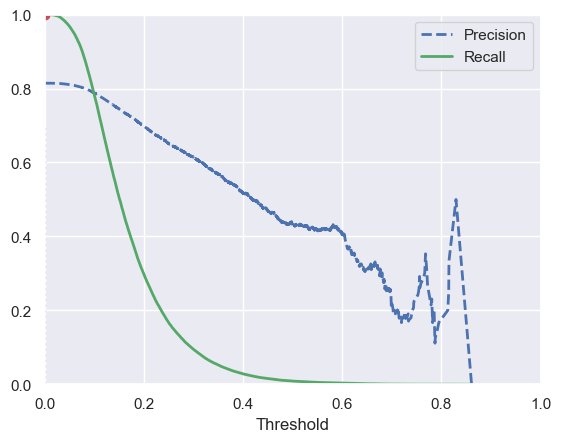

In [2016]:
def plot_precision_recall_vs_threshold(precision, recall, threshold):
    recall_80_precision = recall[np.argmax(precision >= 0.7)]
    threshold_80_precision = threshold[np.argmax(precision >= 0.7)]
    
    plt.plot(threshold, precision[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(threshold, recall[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold")
    plt.plot([threshold_80_precision, threshold_80_precision], [0, 0.7], "r:")
    plt.axis([0, 1, 0, 1])
    #plt.plot([-4, threshold_80_precision], [0.7, 0.78], "r:")
    plt.plot([-4, threshold_80_precision], [recall_80_precision, recall_80_precision], "r:")
    #plt.plot([threshold_80_precision], [0.78], "ro") 
    plt.plot([threshold_80_precision], [recall_80_precision], "ro")
    plt.grid(True)
    plt.legend()
    
plot_precision_recall_vs_threshold(precision, recall, threshold)
plt.show()

In [2051]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test.values, prediction_scores[:,1], pos_label=1)

In [2052]:
from sklearn.metrics import roc_curve
# Compute the true positive and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.values, prediction_scores[:,1], pos_label=1)

In [2053]:
#grid_CNB.fit(X_train, y_train)
#pred = clf_txt.predict(X_test)
prediction_labels = model_log_reg.predict(x_test)
prediction_scores = model_log_reg.predict_proba(x_test)

In [2054]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
%matplotlib inline

ROC-AUC score
Compute the size of this AUC space, known as the ROC-AUC score.

In [2055]:
accuracy_score(y_test, prediction_labels)

0.8187948981087817

In [ ]:
# Plotting the true positive and false positive rate
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)
    plt.title("Solution Grid Complement NB: ROC test - CV:10, AUC: " + str(roc_auc_score(y_test, prediction_scores[:,1])))

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

Ejemplo: ¿Cuál es el punto de corte a utilizar en producción para que no tengamos más del 1% de falsos positivos consiguiendo el mayor número de verdaderos positivos?

In [2056]:
df_metrics = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'thresholds': thresholds})
df_metrics[df_metrics.fpr <= 0.10].sort_values(by="fpr", ascending=False).head(100)

,fpr,tpr,thresholds
840,0.099874,0.268615,0.292495
839,0.099874,0.268215,0.292510
838,0.099605,0.268215,0.292760
837,0.099605,0.267414,0.292827
836,0.099426,0.267414,0.292876
...,...,...,...
745,0.085786,0.243395,0.304319
744,0.085427,0.243395,0.304542
743,0.085427,0.242994,0.304648
742,0.085337,0.242994,0.304706


# Modificar

In [2166]:
#punto_corte = df_metrics[df_metrics.fpr < 0.01].sort_values(by=["fpr", "tpr"], ascending=False).head(1)
punto_corte = df_metrics[df_metrics.fpr < 0.5].sort_values(by=["fpr", "tpr"], ascending=False).head(1)
punto_corte

,fpr,tpr,thresholds
3124,0.499551,0.7494,0.151918


In [2167]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_test, prediction_scores[:,1], pos_label=0)

thresholds_ = np.append(threshold, 1)
precision_recall = pd.DataFrame({'precision': precision, 'recall': recall, 'thresholds': thresholds_})
tpr_fpr = pd.DataFrame({'tpr': tpr, 'fpr': fpr, 'thresholds': thresholds})

metrics = tpr_fpr.merge(precision_recall, how="inner", on="thresholds")
metrics
#metrics[metrics.fpr <= 0.01]


,tpr,fpr,thresholds,precision,recall
0,0.000400,0.000000,0.795200,0.000000,0.000000
1,0.001601,0.000000,0.767882,0.000000,0.000000
2,0.001601,0.000179,0.742825,0.333333,0.000179
3,0.002402,0.000179,0.737185,0.250000,0.000179
4,0.002402,0.000449,0.725562,0.454545,0.000449
...,...,...,...,...,...
5097,0.999199,0.998205,0.021035,0.816740,0.998205
5098,0.999600,0.998205,0.020939,0.816680,0.998205
5099,0.999600,0.998295,0.020874,0.816694,0.998295
5100,1.000000,0.998295,0.020820,0.816634,0.998295


A partir del punto de corte se genera la matriz de confusión asociada. Aquellos valores que sean iguales o superiores al punto de corte seleccionado se etiquetarán como etiqueta positiva.

In [2168]:
print(punto_corte.thresholds.values[0])
print(punto_corte)

0.1519180709643261
           fpr     tpr  thresholds
3124  0.499551  0.7494    0.151918


In [2169]:
labels_punto_corte = [1 if prediction >= punto_corte.thresholds.values[0] else 0
                      for prediction in prediction_scores[:,1]]

Reference

sklearn.metrics.confusion_matrix

Thus in binary classification, the count of true negatives is C00, false negatives is C10, true positives is C11 and false positives is C01.

Recall = TP / (TP + FN) = TP / P = TPR Precision = TP / (TP + FP) = TP / PP

In [2170]:
confusion_matrix(y_test, labels_punto_corte)

array([[5577, 5567],
       [ 626, 1872]], dtype=int64)

Confusion Matrix 1122 = TN (C0,0), 10022 = FP (C0,1) 69 = FN (C1,0), 2429 = TP (C1,1)

In [2171]:
tn, fp, fn, tp = confusion_matrix(y_test, labels_punto_corte).ravel()
(tn, fp, fn, tp)


(5577, 5567, 626, 1872)

### Nuevo modelo de regresión logistica con el punto de corte establecido por nosotros

In [2181]:
punto_corte.thresholds.values[0]

0.1519180709643261

In [2182]:
threshold_new = punto_corte.thresholds.values[0]

y_pred = (model_log_reg.predict_proba(x_test)[:, 1] > threshold_new).astype('float')
confusion_matrix(y_test, y_pred)

array([[5579, 5565],
       [ 626, 1872]], dtype=int64)

In [2185]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

score_new = accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)
report_new = classification_report(y_test,y_pred)
print(report_new)

accuracy:   0.819
              precision    recall  f1-score   support

           0       0.90      0.50      0.64     11144
           1       0.25      0.75      0.38      2498

    accuracy                           0.55     13642
   macro avg       0.58      0.63      0.51     13642
weighted avg       0.78      0.55      0.59     13642



Se ejecutaron varios proceso con distintos umbrables de fpr, es decir, se probaron los siguientes umbrales:

* (df_metrics.fpr < 0.3) -> Recall (0) = 0.70, disminución de los FN en 47.01%
* (df_metrics.fpr < 0.5) -> Recall (0) = 0.50, disminución de los FN en 26.37%
* (df_metrics.fpr < 0.7) -> Recall (0) = 0.30, disminución de los FN en 12.37%
* (df_metrics.fpr < 0.9) -> Recall (0) = 0.10, disminución de los FN en 2.91%

A mi consideración, creo que dejar el umbral de "df_metrics.fpr < 0.5" es el mejor, ya que caen hasta la cuarta parte (26%) el número de Falso Negativos respecto del primer modelo. Es decir, no bajamos todos, pero si dejamos de predecir de forma incorrecta muchos.  

# !Hasta aqui

#### Modelo experimentando eliminando diferentes variables

In [ ]:
sub_set =[]
sub_set = [c for c in df_chi_q if ('atraso_15' not in c)]
sub_set = [c for c in sub_set if ('mes' not in c)]
#sub_set = [c for c in sub_set if ('dia' not in c)]
#sub_set = [c for c in sub_set if ('opera' not in c)]
#sub_set = [c for c in sub_set if ('dianom' not in c)]
#sub_set = [c for c in sub_set if ('tipovuelo' not in c)]
#sub_set = [c for c in sub_set if ('siglades' not in c)]
#sub_set = [c for c in sub_set if ('temporada_alta' not in c)]
#sub_set = [c for c in sub_set if ('periodo_dia' not in c)]

print('sub_set:',len(sub_set))
X_1 = df_chi_q[sub_set]
var_cat = X_1.columns
var_cat = var_cat.to_list()
#type(var_cat)
#X = X.df_chi_q('alguna_variable', axis=1)
y = df['atraso_15']

x_train, x_test, y_train, y_test = preprocess_split(X_1, y, #scale_x=True, 
                                                    test_size=0.2,
                                                    cat_variables = var_cat, 
                                                    random_state=2453)
#print(X.columns)
log_regression(x_train, x_test, y_train, y_test)

#Accuracy:  0.8182817768655622 -> Eliminando variable día
#Accuracy:  0.8177686556223428 -> Eliminando variable opera
#Accuracy:  0.8175487465181058 -> Eliminando variable día y opera
#Accuracy:  0.8197478375604753 -> Eliminando variable mes
#Accuracy:  0.8196745345257294 -> Eliminando variable mes y tipo_vuelo

print('Shape dataset X_1:',X_1.shape[1])
print('Shape list var_cat',len(var_cat))


#### Correlacion Biserial Puntual

In [ ]:
#from scipy.stats import pointbiserialr

#for c in ['mes_2','mes_3','mes_4','mes_5','mes_6','mes_7','mes_8','mes_9','mes_10','mes_11','mes_12']:
#  pbc = pointbiserialr(X[c], df['atraso_15'])
#  print(c, ',atraso_15')
#  print('Correlation: ', pbc[0])
#  print('P-value: ', pbc[1])
#  print()

#### Feature Importance

In [1883]:
# random forest for feature importance on a classification problem
from sklearn.ensemble import RandomForestClassifier

# Modelo con las variables extraidas de la prueba chi-cuadrada

cat_variables =  ['opera_Latin American Wings','mes_7','tipovuelo_N','opera_Air Canada','siglades_Buenos Aires','siglades_Sydney','mes_12',
'opera_Qantas Airways','opera_Copa Air','siglades_Ciudad de Panama','mes_3','opera_Gol Trans','mes_4','siglades_Calama','dianom_Viernes',
'siglades_Cordoba','siglades_Sao Paulo','siglades_Rio de Janeiro','siglades_Auckland N.Z.','siglades_Mendoza','siglades_Lima',
'opera_American Airlines','mes_10','opera_Plus Ultra Lineas Aereas','siglades_Bogota','opera_Aeromexico','dia_15','opera_Avianca',
'mes_2','siglades_Rosario','temporada_alta_1','opera_United Airlines','siglades_Houston','siglades_Arica','siglades_Ciudad de Mexico',
'opera_Delta Air','siglades_Atlanta','periodo_dia_tarde','dia_11','siglades_Melbourne','siglades_Toronto','siglades_Dallas','siglades_Copiapo',
'dianom_Sabado','periodo_dia_noche','mes_5','dia_10','opera_Air France','siglades_Paris','siglades_Concepcion','dianom_Lunes','siglades_Castro (Chiloe)',
'opera_Iberia','opera_K.L.M.','dianom_Martes','siglades_Asuncion','siglades_Temuco','dianom_Jueves','siglades_Punta Arenas','dianom_Miercoles']

df_chi_q = df[['atraso_15','dia','mes','dianom','tipovuelo','opera','siglades','temporada_alta','periodo_dia']]
df_chi_q = pd.get_dummies(df_chi_q, columns=['dia','mes','dianom','tipovuelo','opera','siglades','temporada_alta','periodo_dia'], drop_first=True)
#df_chi_q.columns

#X = df_chi_q.loc[:, df_chi_q.columns!='atraso_15']
X = df_chi_q.loc[:,['opera_Latin American Wings','mes_7','tipovuelo_N','opera_Air Canada','siglades_Buenos Aires','siglades_Sydney','mes_12',
'opera_Qantas Airways','opera_Copa Air','siglades_Ciudad de Panama','mes_3','opera_Gol Trans','mes_4','siglades_Calama','dianom_Viernes',
'siglades_Cordoba','siglades_Sao Paulo','siglades_Rio de Janeiro','siglades_Auckland N.Z.','siglades_Mendoza','siglades_Lima',
'opera_American Airlines','mes_10','opera_Plus Ultra Lineas Aereas','siglades_Bogota','opera_Aeromexico','dia_15','opera_Avianca',
'mes_2','siglades_Rosario','temporada_alta_1','opera_United Airlines','siglades_Houston','siglades_Arica','siglades_Ciudad de Mexico',
'opera_Delta Air','siglades_Atlanta','periodo_dia_tarde','dia_11','siglades_Melbourne','siglades_Toronto','siglades_Dallas','siglades_Copiapo',
'dianom_Sabado','periodo_dia_noche','mes_5','dia_10','opera_Air France','siglades_Paris','siglades_Concepcion','dianom_Lunes','siglades_Castro (Chiloe)',
'opera_Iberia','opera_K.L.M.','dianom_Martes','siglades_Asuncion','siglades_Temuco','dianom_Jueves','siglades_Punta Arenas','dianom_Miercoles']]

y = df['atraso_15']

x_train, x_test, y_train, y_test = preprocess_split(X, y, #scale_x=True, 
                                                    random_state=5874,
                                                    cat_variables =cat_variables, 
                                                    test_size=0.2)
# define the model
model = RandomForestClassifier(n_estimators=1000,criterion='gini',max_depth=None,min_samples_split=5,min_samples_leaf=10,random_state=28347)

# fit the model
model.fit(x_train, y_train)
# get importance
importance = model.feature_importances_
df_importance = pd.DataFrame.from_dict({'variable':X.columns,'importance':importance})
df_importance = df_importance.sort_values(['importance'],ascending = False)
df_importance.to_csv('C:/Archivos Globant/Globant/Challenge/Challenge - Data Scientist -20220817/df_importance.csv', sep=',', encoding='utf-8')
df_importance

,variable,importance
1,mes_7,0.081812
0,opera_Latin American Wings,0.075094
2,tipovuelo_N,0.063195
37,periodo_dia_tarde,0.049420
44,periodo_dia_noche,0.045164
6,mes_12,0.040561
30,temporada_alta_1,0.035698
3,opera_Air Canada,0.031125
22,mes_10,0.027612
14,dianom_Viernes,0.027527


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

predictions = model.predict(x_test)
# RMSE
mean_squared_error(y_test, predictions,squared=False)

In [ ]:
# MAE
mean_absolute_error(y_test, predictions)

In [ ]:
# Error de test del modelo
#-------------------------------------------------------------------------------
#import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix

#%matplotlib inline

predictions = model.predict(x_test)

print("Matriz de confusión")
print("-------------------")
confusion_matrix(y_test,predictions)

In [ ]:
#x_train, x_test, y_train, y_test 
predictions = model.predict(x_test)
prediction_scores = model.predict_proba(x_test)
accuracy = accuracy_score(y_true= y_test,y_pred= predictions)
print(f"El accuracy de test es: {100 * accuracy} %")

In [ ]:
# Area bajo la curva (AUC)
roc_auc_score(y_test, prediction_scores[:,1])

* Grafica el ROC y obtén el AUC

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test.values, prediction_scores[:,1], pos_label=1)


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test.values, prediction_scores[:,1], pos_label=1)

plt.clf()
plt.plot([0, 1], [0, 1], 'k--', c="red")
plt.plot(fpr, tpr)
plt.title("ROC curve & AUC: " + str(roc_auc_score(y_test, prediction_scores[:,1]).round(4)))
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

### Red Neuronal Artificial

In [1867]:
df['atraso_15']

0        0
1        0
2        0
3        0
4        0
        ..
68201    1
68202    1
68203    1
68204    0
68205    0
Name: atraso_15, Length: 68206, dtype: int64

In [1868]:
from tensorflow.keras.utils import to_categorical
y = df['atraso_15']
#y = to_categorical(y)
#y = np.delete(y, 0, axis=1)
#y = y.reshape((len(y), 1))
y

0        0
1        0
2        0
3        0
4        0
        ..
68201    1
68202    1
68203    1
68204    0
68205    0
Name: atraso_15, Length: 68206, dtype: int64

In [1869]:
df.dif_min.info()

<class 'pandas.core.series.Series'>
RangeIndex: 68206 entries, 0 to 68205
Series name: dif_min
Non-Null Count  Dtype  
--------------  -----  
68206 non-null  float64
dtypes: float64(1)
memory usage: 533.0 KB


In [1876]:
df_chi_q = df[['atraso_15','dia','mes','dianom','tipovuelo','opera','siglades','temporada_alta','periodo_dia']]
df_chi_q = pd.get_dummies(df_chi_q, columns=['dia','mes','dianom','tipovuelo','opera','siglades','temporada_alta','periodo_dia'], drop_first=True)

X_completa = df_chi_q.loc[:,['opera_Latin American Wings','mes_7','tipovuelo_N','opera_Air Canada','siglades_Buenos Aires','siglades_Sydney','mes_12',
'opera_Qantas Airways','opera_Copa Air','siglades_Ciudad de Panama','mes_3','opera_Gol Trans','mes_4','siglades_Calama','dianom_Viernes',
'siglades_Cordoba','siglades_Sao Paulo','siglades_Rio de Janeiro','siglades_Auckland N.Z.','siglades_Mendoza','siglades_Lima',
#'opera_American Airlines','mes_10','opera_Plus Ultra Lineas Aereas','siglades_Bogota','opera_Aeromexico','dia_15','opera_Avianca',
#'mes_2','siglades_Rosario','temporada_alta_1','opera_United Airlines','siglades_Houston','siglades_Arica','siglades_Ciudad de Mexico',
#'opera_Delta Air','siglades_Atlanta','periodo_dia_tarde','dia_11','siglades_Melbourne','siglades_Toronto','siglades_Dallas','siglades_Copiapo',
#'dianom_Sabado','periodo_dia_noche','mes_5','dia_10','opera_Air France','siglades_Paris','siglades_Concepcion','dianom_Lunes','siglades_Castro (Chiloe)',
#'opera_Iberia','opera_K.L.M.','dianom_Martes','siglades_Asuncion','siglades_Temuco','dianom_Jueves','siglades_Punta Arenas','dianom_Miercoles',
#'dia_7','opera_Grupo LATAM','dia_2','dia_27','siglades_Ushuia','opera_Alitalia','siglades_Roma','siglades_Quito','siglades_La Serena','siglades_Balmaceda',
#'siglades_Punta Cana','siglades_Puerto Montt','dia_8','dia_16','dia_30','dia_31','mes_6','mes_11','mes_9','mes_8','opera_Sky Airline','siglades_Iquique',
#'siglades_Puerto Natales','siglades_Los Angeles','siglades_Puerto Stanley','siglades_Cochabamba','dia_14','siglades_Valdivia',
#'dia_29'
]]

#X_completa = df_chi_q.loc[:,['opera_Qantas Airways', 'siglades_Ciudad de Panama', 'opera_Avianca', 'siglades_Houston', 'siglades_Ciudad de Mexico', 'siglades_Atlanta', 'siglades_Toronto', 'siglades_Dallas', 'siglades_Paris']]

#X_completa = df_chi_q.loc[:,]
#X_completa = X_completa.drop(['atraso_15'], axis=1)
#X_completa

#from tensorflow.keras.utils import to_categorical
y = df['atraso_15']
y

#print(y.info())
print('Shape X_completa:',X_completa.shape[1])

Shape X_completa: 21


In [ ]:
#feature_correlation = X_completa.loc[:, X_completa.columns != 'charged_off'].corr()
#feature_correlation
#feature_correlation.to_csv('feature_correlation.csv', sep=',', encoding='utf-8')


In [1877]:
feature_correlation = X_completa.loc[:, X_completa.columns != 'charged_off'].corr()
feature_correlation

# Solo usaremos la matriz triangular
# Recuerda que la matriz de correlacion es simetrica
upper = feature_correlation.where(np.triu(np.ones(
    feature_correlation.shape), k=1).astype(np.bool))

# Encuentra variables con correlacion mayor a threshold
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]

to_drop

#to_drop_v1 = ['siglades_Paris','siglades_Houston','opera_Qantas Airways','siglades_Ciudad de Mexico','siglades_Toronto','siglades_Dallas','opera_Avianca']
#to_drop_v1

['opera_Qantas Airways', 'siglades_Ciudad de Panama']

In [ ]:
# Eliminar columnas 
#X_completa.drop(to_drop_v1, axis=1, inplace=True)
#print('Shape X_completa:',X_completa.shape[1])

In [1878]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

X_train, X_test, y_train, y_test = train_test_split(X_completa, y, test_size = 0.2, random_state = 0)
print(X_train.shape[1])

21


In [1879]:
y_train.value_counts(normalize =True)

0    0.815061
1    0.184939
Name: atraso_15, dtype: float64

In [1880]:
#X_train.drop(['atraso_15'], axis = 'columns', inplace=True)
#X_test.drop(['atraso_15'], axis = 'columns', inplace=True)
X_train

,opera_Latin American Wings,mes_7,tipovuelo_N,opera_Air Canada,siglades_Buenos Aires,siglades_Sydney,mes_12,opera_Qantas Airways,opera_Copa Air,siglades_Ciudad de Panama,mes_3,opera_Gol Trans,mes_4,siglades_Calama,dianom_Viernes,siglades_Cordoba,siglades_Sao Paulo,siglades_Rio de Janeiro,siglades_Auckland N.Z.,siglades_Mendoza,siglades_Lima
21733,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
30677,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6711,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
67547,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9284,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41993,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21243,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
45891,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42613,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1881]:
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)
test_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 21), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [1882]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

kernel_initializer = tf.keras.initializers.LecunNormal(seed=456)

#reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5,
#                              patience=5, min_lr=0.0001 )

#optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)

model_rna = Sequential()
model_rna.add(Dense(units = 64, input_dim = X_train.shape[1], activation = "relu",kernel_initializer = kernel_initializer, ))
#model_rna.add(Dropout(0.2))
model_rna.add(Dense(units = 32, activation = "relu",kernel_initializer = kernel_initializer, ))
#model_rna.add(Dropout(0.2))
model_rna.add(Dense(units = 16, activation = "relu",kernel_initializer = kernel_initializer))
#model_rna.add(Dropout(0.2))
model_rna.add(Dense(units = 8, activation = "relu",kernel_initializer = kernel_initializer))
#model_rna.add(Dropout(0.2))
model_rna.add(Dense(units = 1, activation = "sigmoid",kernel_initializer = kernel_initializer))
model_rna.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

#model_rna.fit(X_train, y_train,  batch_size = 32, epochs = 5, verbose=1,)

history = model_rna.fit(X_train, y_train,  batch_size = 64, epochs = 100, verbose=1,
                    #validation_split=0.1)
                    validation_data=test_ds)#,callbacks=[reduce_lr])

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

#ax[1].plot(history.history['top_k_categorical_accuracy'], color='b', label="Training accuracy")
#ax[1].plot(history.history['val_top_k_categorical_accuracy'], color='r',label="Validation accuracy")
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

test_loss, test_accuracy = model_rna.evaluate(X_test, y_test)
print("Test accuracy: {}".format(test_accuracy))

#Becnmark logaritmo -> -accuracy:  0.8179885647265797

#Test accuracy: 0.8216537237167358
#Test accuracy: 0.8217270374298096

Epoch 1/100
853/853 [==============================] - 2s 2ms/step - loss: 0.4699 - accuracy: 0.8150 - val_loss: 0.4557 - val_accuracy: 0.8151
Epoch 2/100
853/853 [==============================] - 2s 2ms/step - loss: 0.4562 - accuracy: 0.8159 - val_loss: 0.4546 - val_accuracy: 0.8176
Epoch 3/100
853/853 [==============================] - 2s 3ms/step - loss: 0.4554 - accuracy: 0.8175 - val_loss: 0.4559 - val_accuracy: 0.8181
Epoch 4/100
853/853 [==============================] - 2s 3ms/step - loss: 0.4547 - accuracy: 0.8177 - val_loss: 0.4547 - val_accuracy: 0.8170
Epoch 5/100
853/853 [==============================] - 3s 3ms/step - loss: 0.4544 - accuracy: 0.8176 - val_loss: 0.4544 - val_accuracy: 0.8176
Epoch 6/100
853/853 [==============================] - 3s 4ms/step - loss: 0.4542 - accuracy: 0.8180 - val_loss: 0.4554 - val_accuracy: 0.8182
Epoch 7/100
853/853 [==============================] - 3s 4ms/step - loss: 0.4539 - accuracy: 0.8182 - val_loss: 0.4551 - val_accuracy: 0.8165

KeyboardInterrupt: 

In [ ]:
print("Test accuracy: {}".format(test_accuracy))

In [ ]:
Y_test_cat=np.argmax(y_test, axis=1)
Y_test_cat

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
#https://www.programcreek.com/python/example/87183/sklearn.metrics.confusion_matrix
from sklearn.metrics import confusion_matrix
Y_pred  = model_rna.predict(X_test)
Y_pred=np.argmax(Y_pred, axis=1)

#Y_test_cat=np.argmax(y_test, axis=1)
#Y_test_cat
Y_test_cat = y_test

#matrix = confusion_matrix(Y_test.argmax(axis=1), Y_pred.argmax(axis=1))
matrix = confusion_matrix(Y_test_cat,Y_pred)
matrix

#Label = positions = ["Data Scientist", "Java Developer", "Python Developer", "Test Automation Engineer", "Quality Control Engineer", "Web UI", "Android Developer", "iOS Developer", "Project Manager","Cloud Engineer"]

Label = positions = ['Atraso','No atraso']

def plot_confusion_matrix(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, xticklabels=Label, yticklabels=Label, annot=True, fmt="d")
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.savefig("confusion_matrix.png", bbox_inches='tight')
    plt.show() 

plot_confusion_matrix(Y_test_cat,Y_pred)

##### Otra idea
* https://www.tensorflow.org/tutorials/structured_data/feature_columns#bucketized_columns

In [1751]:
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [1834]:
df_chi_q = df[['atraso_15','dia','mes','dianom','tipovuelo','opera','siglades','temporada_alta','periodo_dia']]
df_chi_q['dia'] = df_chi_q.dia.astype(int)
df_chi_q

#df_chi_q = pd.get_dummies(df_chi_q, columns=['dia','mes','dianom','tipovuelo','opera','siglades','temporada_alta','periodo_dia'], drop_first=True)

#X_completa = df_chi_q.loc[:,['opera_Latin American Wings','mes_7','tipovuelo_N','opera_Air Canada','siglades_Buenos Aires','siglades_Sydney','mes_12',
#'opera_Qantas Airways','opera_Copa Air','siglades_Ciudad de Panama','mes_3','opera_Gol Trans','mes_4','siglades_Calama','dianom_Viernes',
#'siglades_Cordoba','siglades_Sao Paulo','siglades_Rio de Janeiro','siglades_Auckland N.Z.','siglades_Mendoza','siglades_Lima',
#'opera_American Airlines','mes_10','opera_Plus Ultra Lineas Aereas','siglades_Bogota','opera_Aeromexico','dia_15','opera_Avianca',
#'mes_2','siglades_Rosario','temporada_alta_1','opera_United Airlines','siglades_Houston','siglades_Arica','siglades_Ciudad de Mexico',
#'opera_Delta Air','siglades_Atlanta','periodo_dia_tarde','dia_11','siglades_Melbourne','siglades_Toronto','siglades_Dallas','siglades_Copiapo',
#'dianom_Sabado','periodo_dia_noche','mes_5','dia_10','opera_Air France','siglades_Paris','siglades_Concepcion','dianom_Lunes','siglades_Castro (Chiloe)',
#'opera_Iberia','opera_K.L.M.','dianom_Martes','siglades_Asuncion','siglades_Temuco','dianom_Jueves','siglades_Punta Arenas','dianom_Miercoles',
#'dia_7','opera_Grupo LATAM','dia_2','dia_27','siglades_Ushuia','opera_Alitalia','siglades_Roma','siglades_Quito','siglades_La Serena','siglades_Balmaceda',
#'siglades_Punta Cana','siglades_Puerto Montt','dia_8','dia_16','dia_30','dia_31','mes_6','mes_11','mes_9','mes_8','opera_Sky Airline','siglades_Iquique',
#'siglades_Puerto Natales','siglades_Los Angeles','siglades_Puerto Stanley','siglades_Cochabamba','dia_14','siglades_Valdivia',
#'dia_29'
#]]

#X_completa = df_chi_q.loc[:,['opera_Qantas Airways', 'siglades_Ciudad de Panama', 'opera_Avianca', 'siglades_Houston', 'siglades_Ciudad de Mexico', 'siglades_Atlanta', 'siglades_Toronto', 'siglades_Dallas', 'siglades_Paris']]

#X_completa = df_chi_q.loc[:,]
#X_completa = X_completa.drop(['atraso_15'], axis=1)
#X_completa

#from tensorflow.keras.utils import to_categorical
y = df['atraso_15']
y

#print(y.info())
print('Shape X_completa:',X_completa.shape[1])

Shape X_completa: 21


Split the dataframe into train, validation, and test

The dataset we downloaded was a single CSV file. We will split this into train, validation, and test sets.

In [1819]:
train, test = train_test_split(df_chi_q, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

43651 train examples
10913 validation examples
13642 test examples


Create an input pipeline using tf.data

Next, we will wrap the dataframes with tf.data. This will enable us to use feature columns as a bridge to map from the columns in the Pandas dataframe to features used to train the model. If we were working with a very large CSV file (so large that it does not fit into memory), we would use tf.data to read it from disk directly. That is not covered in this tutorial.

In [1737]:
# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('atraso_15')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [1738]:
batch_size = 5 # A small batch sized is used for demonstration purposes
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

Understand the input pipeline

Now that we have created the input pipeline, let's call it to see the format of the data it returns. We have used a small batch size to keep the output readable.

In [1841]:
for feature_batch, label_batch in train_ds.take(1):
  print('Every feature:', list(feature_batch.keys()))
  print('A batch of ages:', feature_batch['dia'])
  print('A batch of targets:', label_batch )

Every feature: ['dia', 'mes', 'dianom', 'tipovuelo', 'opera', 'siglades', 'temporada_alta', 'periodo_dia']
A batch of ages: tf.Tensor(
[12  5 18 26 26  6  8  3  1  9 22  9  4 23  8 10 17 12 15  4 16 25 19 20
  1 23 20 26 18 20 29 10 10 27 17 18  9 29 15 11  2  2 26 28  1 18 17 17
  4  4 13 22 23 27  7  2 18  9  6  2 11 18 11  8], shape=(64,), dtype=int32)
A batch of targets: tf.Tensor(
[0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1], shape=(64,), dtype=int64)


Demonstrate several types of feature columns.

TensorFlow provides many types of feature columns. In this section, we will create several types of feature columns, and demonstrate how they transform a column from the dataframe.

In [1739]:
# We will use this batch to demonstrate several types of feature columns
example_batch = next(iter(train_ds))[0]

In [1740]:
# A utility method to create a feature column
# and to transform a batch of data
def demo(feature_column):
  feature_layer = layers.DenseFeatures(feature_column)
  print(feature_layer(example_batch).numpy())

Numeric columns

The output of a feature column becomes the input to the model (using the demo function defined above, we will be able to see exactly how each column from the dataframe is transformed). A numeric column is the simplest type of column. It is used to represent real valued features. When using this column, your model will receive the column value from the dataframe unchanged.

In [1742]:
photo_count = feature_column.numeric_column('dia')
demo(photo_count)

[[ 4.]
 [ 2.]
 [21.]
 [23.]
 [29.]]


Bucketized columns

Often, you don't want to feed a number directly into the model, but instead split its value into different categories based on numerical ranges. Consider raw data that represents a person's age. Instead of representing age as a numeric column, we could split the age into several buckets using a bucketized column. Notice the one-hot values below describe which age range each row matches.

In [1810]:
dia = feature_column.numeric_column('dia')
dia_buckets = feature_column.bucketized_column(dia, boundaries=[1, 3, 5])
demo(dia_buckets)

[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


Categorical columns

In this dataset, Type is represented as a string (e.g. 'Dog', or 'Cat'). We cannot feed strings directly to a model. Instead, we must first map them to numeric values. The categorical vocabulary columns provide a way to represent strings as a one-hot vector (much like you have seen above with age buckets). The vocabulary can be passed as a list using categorical_column_with_vocabulary_list, or loaded from a file using categorical_column_with_vocabulary_file.

In [1746]:
tipovuelo_type = feature_column.categorical_column_with_vocabulary_list(
      'tipovuelo', ['I', 'N'])

tipovuelo_type = feature_column.indicator_column(tipovuelo_type)
demo(tipovuelo_type)

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


Embedding columns

Suppose instead of having just a few possible strings, we have thousands (or more) values per category. For a number of reasons, as the number of categories grow large, it becomes infeasible to train a neural network using one-hot encodings. We can use an embedding column to overcome this limitation. Instead of representing the data as a one-hot vector of many dimensions, an embedding column represents that data as a lower-dimensional, dense vector in which each cell can contain any number, not just 0 or 1. The size of the embedding (8, in the example below) is a parameter that must be tuned.

In [1753]:
# Notice the input to the embedding column is the categorical column
# we previously created
dianom1 = feature_column.categorical_column_with_vocabulary_list(
      'dianom', df_chi_q.dianom.unique())
dianom1_embedding = feature_column.embedding_column(dianom1, dimension=8)
demo(dianom1_embedding)

[[-0.5182752  -0.42163253 -0.19825159  0.6697124  -0.29878935 -0.40917826
   0.04402944  0.36633348]
 [-0.5182752  -0.42163253 -0.19825159  0.6697124  -0.29878935 -0.40917826
   0.04402944  0.36633348]
 [ 0.08614013 -0.6471165   0.23960304  0.14526808  0.44776237 -0.10954463
  -0.10734567  0.11249832]
 [ 0.08614013 -0.6471165   0.23960304  0.14526808  0.44776237 -0.10954463
  -0.10734567  0.11249832]
 [ 0.29845545  0.1827455   0.28560257  0.3800443  -0.13435915  0.04864408
  -0.13234353 -0.18111669]]


In [1771]:
opera1 = feature_column.categorical_column_with_vocabulary_list(
      'opera', df_chi_q.opera.unique())
opera1_embedding = feature_column.embedding_column(opera1, dimension=2)
demo(opera1_embedding)

[[-1.4016355  -0.4222687 ]
 [ 0.7692442   1.372688  ]
 [ 0.7692442   1.372688  ]
 [ 0.42375937 -0.21733037]
 [ 0.40636885  0.7738267 ]]


Hashed feature columns

Another way to represent a categorical column with a large number of values is to use a categorical_column_with_hash_bucket. This feature column calculates a hash value of the input, then selects one of the hash_bucket_size buckets to encode a string. When using this column, you do not need to provide the vocabulary, and you can choose to make the number of hash_buckets significantly smaller than the number of actual categories to save space.

In [1748]:
dianom1_hashed = feature_column.categorical_column_with_hash_bucket(
      'dianom', hash_bucket_size=10)
demo(feature_column.indicator_column(dianom1_hashed))

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


Choose which columns to use

We have seen how to use several types of feature columns. Now we will use them to train a model. The goal of this tutorial is to show you the complete code (e.g. mechanics) needed to work with feature columns. We have selected a few columns to train our model below arbitrarily.

In [1789]:
feature_columns = []

# embedding columns
dia = feature_column.categorical_column_with_vocabulary_list(
      'dia', df_chi_q.dia.unique())
dia_embedding = feature_column.embedding_column(dia, dimension=31)
feature_columns.append(dia_embedding)

mes = feature_column.categorical_column_with_vocabulary_list(
      'mes', df_chi_q.mes.unique())
mes_embedding = feature_column.embedding_column(mes, dimension=8)
feature_columns.append(mes_embedding)

dianom = feature_column.categorical_column_with_vocabulary_list(
      'dianom', df_chi_q.dianom.unique())
dianom_embedding = feature_column.embedding_column(dianom, dimension=8)
feature_columns.append(dianom_embedding)

#tipovuelo = feature_column.categorical_column_with_vocabulary_list(
#      'tipovuelo', df_chi_q.tipovuelo.unique())
#tipovuelo_embedding = feature_column.embedding_column(tipovuelo, dimension=8)
#feature_columns.append(tipovuelo_embedding)

opera = feature_column.categorical_column_with_vocabulary_list(
      'opera', df_chi_q.opera.unique())
opera_embedding = feature_column.embedding_column(opera, dimension=len(df_chi_q.opera.unique()))
feature_columns.append(opera_embedding)

siglades = feature_column.categorical_column_with_vocabulary_list(
      'siglades', df_chi_q.siglades.unique())
siglades_embedding = feature_column.embedding_column(siglades, dimension=len(df_chi_q.siglades.unique()))
feature_columns.append(siglades_embedding)

temporada_alta = feature_column.categorical_column_with_vocabulary_list(
      'temporada_alta', df_chi_q.temporada_alta.unique())
temporada_alta_embedding = feature_column.embedding_column(temporada_alta, dimension=8)
feature_columns.append(temporada_alta_embedding)

periodo_dia = feature_column.categorical_column_with_vocabulary_list(
      'periodo_dia', df_chi_q.periodo_dia.unique())
periodo_dia_embedding = feature_column.embedding_column(periodo_dia, dimension=8)
feature_columns.append(periodo_dia_embedding)

#feature_columns

In [1813]:
feature_columns = []

# indicator_columns
indicator_column_names = ['dia','mes','dianom','tipovuelo','opera','siglades','temporada_alta','periodo_dia']
for col_name in indicator_column_names:
  categorical_column = feature_column.categorical_column_with_vocabulary_list(
      col_name, df_chi_q[col_name].unique())
  indicator_column = feature_column.indicator_column(categorical_column)
  feature_columns.append(indicator_column)

In [ ]:
# numeric cols
#for header in ['PhotoAmt', 'Fee', 'Age']:
#  feature_columns.append(feature_column.numeric_column(header))

Create a feature layer

Now that we have defined our feature columns, we will use a DenseFeatures layer to input them to our Keras model.

In [1814]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

Earlier, we used a small batch size to demonstrate how feature columns worked. We create a new input pipeline with a larger batch size.

In [1815]:
batch_size = 64
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

Create, compile, and train the model

In [1816]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dropout(.1),
  layers.Dense(1,activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_ds,
          validation_data=val_ds,
          epochs=10)

Epoch 1/10
683/683 [==============================] - 4s 5ms/step - loss: 0.4521 - accuracy: 0.1827 - val_loss: 0.4495 - val_accuracy: 0.1925
Epoch 2/10
683/683 [==============================] - 4s 5ms/step - loss: 0.4306 - accuracy: 0.1827 - val_loss: 0.4412 - val_accuracy: 0.1925
Epoch 3/10
683/683 [==============================] - 4s 5ms/step - loss: 0.4174 - accuracy: 0.1827 - val_loss: 0.4414 - val_accuracy: 0.1925
Epoch 4/10
683/683 [==============================] - 5s 7ms/step - loss: 0.4052 - accuracy: 0.1827 - val_loss: 0.4410 - val_accuracy: 0.1925
Epoch 5/10
683/683 [==============================] - 4s 6ms/step - loss: 0.3944 - accuracy: 0.1827 - val_loss: 0.4400 - val_accuracy: 0.1925
Epoch 6/10
683/683 [==============================] - 4s 5ms/step - loss: 0.3851 - accuracy: 0.1827 - val_loss: 0.4502 - val_accuracy: 0.1925
Epoch 7/10
683/683 [==============================] - 4s 6ms/step - loss: 0.3752 - accuracy: 0.1827 - val_loss: 0.4538 - val_accuracy: 0.1925
Epoch 

In [1817]:
loss, accuracy = model.evaluate(test_ds)
print("Accuracy", accuracy)

214/214 [==============================] - 1s 3ms/step - loss: 0.4739 - accuracy: 0.1860
Accuracy 0.18604309856891632


Create, compile, and train the model